In [2]:
# %%
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import Data as Data 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

import matplotlib.pyplot as plt

import pandas as pd # type: ignore
from datetime import datetime # type: ignore
import numpy as np #type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
from prophet import Prophet # type: ignore

d:\Projects\Programming\Gen-I Trading Challenge\Task 2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# %%

data = pd.read_csv('data/dataset_task2.csv')
data.style.apply(lambda x: ["font-size:10pt"]*len(x))

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['DayOfWeek'] = data['date'].dt.dayofweek

data['shift_1d_IDA1'] = data['IDA1price'].shift(96).dropna()
data['shift_1w_IDA1'] = data['IDA1price'].shift(96*7).dropna()

data['shift_1d'] = data['IDA2price'].shift(96).dropna()
data['shift_1w'] = data['IDA2price'].shift(96*7).dropna()

holidays_map = {holiday: i for i, holiday in enumerate(data['holiday'].unique())}
data['holiday'] = data['holiday'].map(holidays_map)

data = data.dropna()
# reorder columns
data = data[['date', 'IDA2price', 'forecast_production', 'production', 'forecast_consumption', 'hour', 'minute', 'IDA1price', 'SIPXprice', 'shift_1d', 'shift_1w', 'DayOfWeek', 'holiday']]

data.index = data['date']
data.drop(columns='date', inplace=True)
data = data.iloc[:-24*4*2, :]
data

,IDA2price,forecast_production,production,forecast_consumption,hour,minute,IDA1price,SIPXprice,shift_1d,shift_1w,DayOfWeek,holiday
date,,,,,,,,,,,,
2024-06-22 00:00:00,200.00,1799.0,1899.0,1139.0,0,0,90.54,114.62,133.87,80.93,5,1
2024-06-22 00:15:00,200.00,1799.0,1899.0,1139.0,0,15,121.60,114.62,118.59,73.73,5,1
2024-06-22 00:30:00,200.00,1799.0,1899.0,1139.0,0,30,122.55,114.62,105.00,61.94,5,1
2024-06-22 00:45:00,200.00,1799.0,1899.0,1139.0,0,45,75.79,114.62,94.14,46.49,5,1
2024-06-22 01:00:00,200.00,1799.0,1899.0,1076.0,1,0,135.00,106.14,118.66,68.86,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 22:45:00,110.01,1735.0,2370.0,1432.0,22,45,87.56,113.00,95.73,80.00,4,1
2024-11-08 23:00:00,118.90,1676.0,2370.0,1327.0,23,0,119.36,104.06,95.73,112.68,4,1
2024-11-08 23:15:00,108.14,1676.0,2370.0,1327.0,23,15,110.95,104.06,95.73,99.18,4,1


In [4]:
# %%

X = data[['hour', 'minute', 'IDA1price', 'forecast_production', 'SIPXprice',
		  'shift_1d', 'shift_1w', 'forecast_consumption', 'DayOfWeek']]
y = data['IDA2price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Final prediction
# split_date = '2024-11-10'  # Change this to your desired date if needed
# X_train = X[data.index < split_date]
# y_train = y[data.index < split_date]
# X_test = X[data.index >= split_date]
# y_test = y[data.index >= split_date]

Mean Absolute Error: 27.75568374162792, RMSE: 43.613948081110685



<Axes: xlabel='date'>

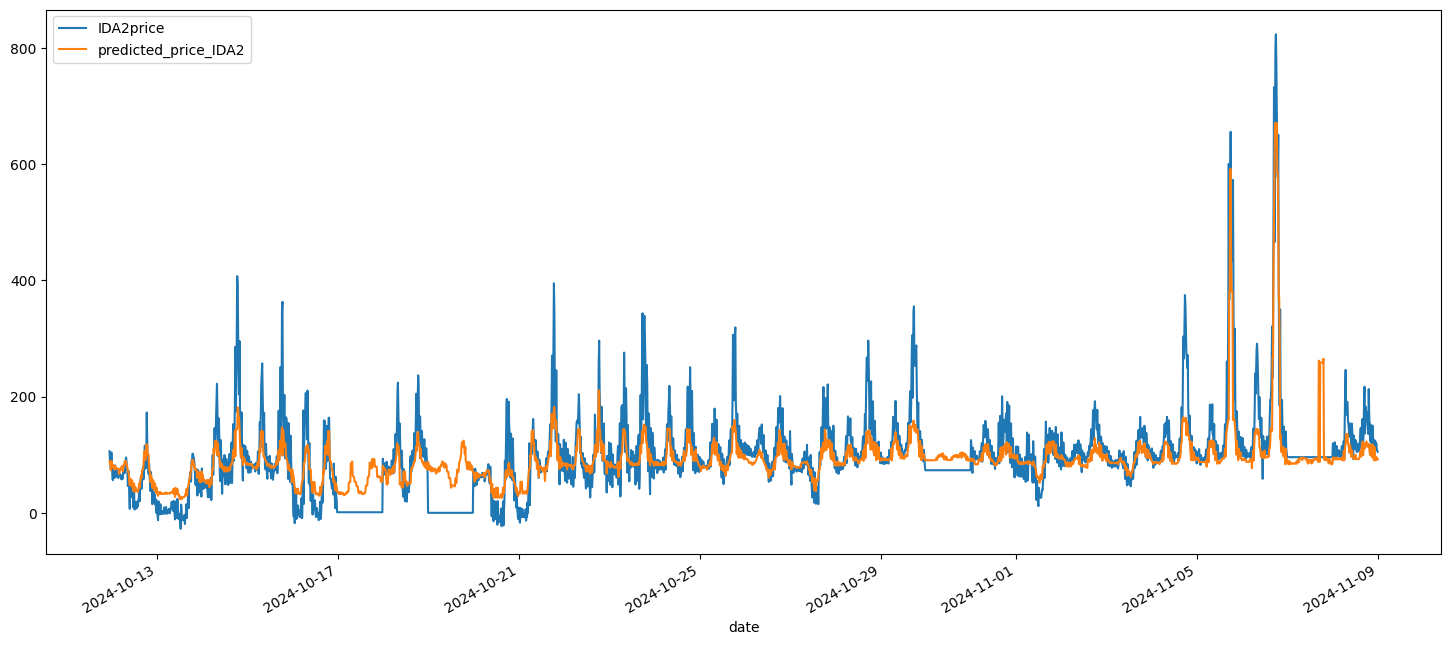

In [5]:
# %%

# Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)
# Mean Absolute Error: 29.680194037123943, RMSE: 45.76756707148307

model = HistGradientBoostingRegressor(loss='squared_error',
									  learning_rate=0.01)
model.fit(X_train, y_train)
# Mean Absolute Error: 25.4754017266614, RMSE: 48.34064373316218

# model = GradientBoostingRegressor(random_state=0,
# 								learning_rate=0.1,
# 								n_estimators=200,
# 								max_depth=5, 
# 								min_samples_split=10)
# model.fit(X_train, y_train)
# Mean Absolute Error: 26.49973051900755, RMSE: 49.67686869135909

# Make predictions
pred = pd.Series(model.predict(X_test), index=y_test.index)
merge = pd.concat([y_test, pred], axis=1, ignore_index=True)
merge.rename(columns={0: 'IDA2price', 1: 'predicted_price_IDA2'}, inplace=True)

#Analyse results
rmse = root_mean_squared_error(merge['IDA2price'], merge['predicted_price_IDA2'])
mae = mean_absolute_error(merge['IDA2price'], merge['predicted_price_IDA2'])

print(f'Mean Absolute Error: {mae}, RMSE: {rmse}', end='\n\n')
merge.plot(figsize=(18, 8))

In [7]:
from sklearn.preprocessing import MinMaxScaler # type: ignore

split_date = '2024-10-20'

data2 = data[['IDA2price', 'IDA1price', 'forecast_production', 'SIPXprice', 'forecast_consumption']]

df_train = data2.loc[data.index < split_date].copy()
df_test = data2.loc[data.index >= split_date].copy()

# scaling the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_train)

df_train_scaled = scaler.transform(df_train)
df_test_scaled = scaler.transform(df_test)

df_train_scaled

array([[0.05212703, 0.88682647, 0.6281407 , 0.17192774, 0.58752026],
       [0.05212703, 0.88955651, 0.6281407 , 0.17192774, 0.58752026],
       [0.05212703, 0.88964001, 0.6281407 , 0.17192774, 0.58752026],
       ...,
       [0.01531286, 0.88542541, 0.74057789, 0.13425782, 0.49027553],
       [0.01531286, 0.88505449, 0.74057789, 0.13425782, 0.49027553],
       [0.01531286, 0.88326757, 0.74057789, 0.13425782, 0.49027553]])

In [8]:
# creating the trainX and trainY
trainX = []
trainY = []

n_future = 1 # number of hours we want to predict into the future
n_past = 24*4*7 # 168 hours, because of weekly variation

for i in range(n_past, len(df_train_scaled) - n_future + 1): # from 168 to the end without going out of bounds
	trainX.append(df_train_scaled[i - n_past:i, 0:df_train_scaled.shape[1]]) # from 168 to the end
	trainY.append(df_train_scaled[i + n_future - 1:i + n_future, 0]) # from 168 to the end

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (10848, 672, 5).
trainY shape == (10848, 1).


In [9]:
# creating the testX and testY
testX = []
testY = []

n_future = 4 # number of hours we want to predict into the future
n_past = 24*4*7 # 168 hours, because of weekly variation

for i in range(n_past, len(df_test_scaled) - n_future + 1): # from 168 to the end without going out of bounds
	testX.append(df_test_scaled[i - n_past:i, 0:df_test_scaled.shape[1]]) # from 168 to the end
	testY.append(df_test_scaled[i + n_future - 1:i + n_future, 0]) # from 168 to the end

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (1241, 672, 5).
testY shape == (1241, 1).


In [10]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, LSTM, Dropout # type: ignore
from keras.optimizers import Adam # type: ignore

# defining the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

# add adam optimizer
adam = Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='mse')
model.summary()

d:\Projects\Programming\Gen-I Trading Challenge\Task 2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 672, 64)        │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.callbacks import EarlyStopping # type: ignore

# fit model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

# earlyStop = EarlyStopping(monitor = "val_loss", verbose = 2, mode = 'min', patience = 2)
# history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_data = (testX, testY), verbose = 1, callbacks = [earlyStop])

Epoch 1/5
611/611 ━━━━━━━━━━━━━━━━━━━━ 138s 220ms/step - loss: 7.9840e-04 - val_loss: 8.5290e-05
Epoch 2/5
611/611 ━━━━━━━━━━━━━━━━━━━━ 147s 240ms/step - loss: 4.1311e-04 - val_loss: 8.5023e-05
Epoch 3/5
611/611 ━━━━━━━━━━━━━━━━━━━━ 139s 228ms/step - loss: 5.6031e-04 - val_loss: 7.9351e-05
Epoch 4/5
611/611 ━━━━━━━━━━━━━━━━━━━━ 153s 250ms/step - loss: 3.8087e-04 - val_loss: 7.5406e-05
Epoch 5/5
611/611 ━━━━━━━━━━━━━━━━━━━━ 153s 250ms/step - loss: 3.3634e-04 - val_loss: 8.1707e-05


In [12]:
n_days_for_prediction = df_test.shape[0]
predict_period_dates = pd.date_range(split_date, periods = n_days_for_prediction, freq='15min').tolist()
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_train_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step


In [13]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i)

In [14]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'IDA2price':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])
df_forecast.index = df_forecast['date']
df_forecast = df_forecast.drop('date', axis=1)
df_forecast

,IDA2price
date,
2024-10-20 00:00:00,54.117371
2024-10-20 00:15:00,53.263588
2024-10-20 00:30:00,52.594597
2024-10-20 00:45:00,52.108746
2024-10-20 01:00:00,51.777027
...,...
2024-11-08 21:45:00,75.273094
2024-11-08 22:00:00,73.943810
2024-11-08 22:15:00,72.492264


In [15]:
df_test = df_test[:n_days_for_prediction]
df_test

,IDA2price,IDA1price,forecast_production,SIPXprice,forecast_consumption
date,,,,,
2024-10-20 00:00:00,74.95,69.21,1847.0,52.07,952.0
2024-10-20 00:15:00,69.01,54.08,1847.0,52.07,952.0
2024-10-20 00:30:00,61.71,43.42,1847.0,52.07,952.0
2024-10-20 00:45:00,45.82,31.59,1847.0,52.07,952.0
2024-10-20 01:00:00,75.63,63.98,1765.0,49.82,904.0
...,...,...,...,...,...
2024-11-08 22:45:00,110.01,87.56,1735.0,113.00,1432.0
2024-11-08 23:00:00,118.90,119.36,1676.0,104.06,1327.0
2024-11-08 23:15:00,108.14,110.95,1676.0,104.06,1327.0


In [16]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error # type: ignore
from sktime.performance_metrics.forecasting import mean_squared_percentage_error # type: ignore

mse = root_mean_squared_error(df_test['IDA2price'], df_forecast['IDA2price'])
mae = mean_absolute_error(df_test['IDA2price'], df_forecast['IDA2price'])
mape = mean_absolute_percentage_error(df_test['IDA2price'], df_forecast['IDA2price'])
rmspe = mean_squared_percentage_error(df_test['IDA2price'], df_forecast['IDA2price'], square_root=True)

plt_title = 'MAE: {0:.2f}, RMSE: {1:.2f}, MAPE: {2:.2f}, RMSPE: {3:.2f}'.format(mae, mse, mape*100, rmspe*100)

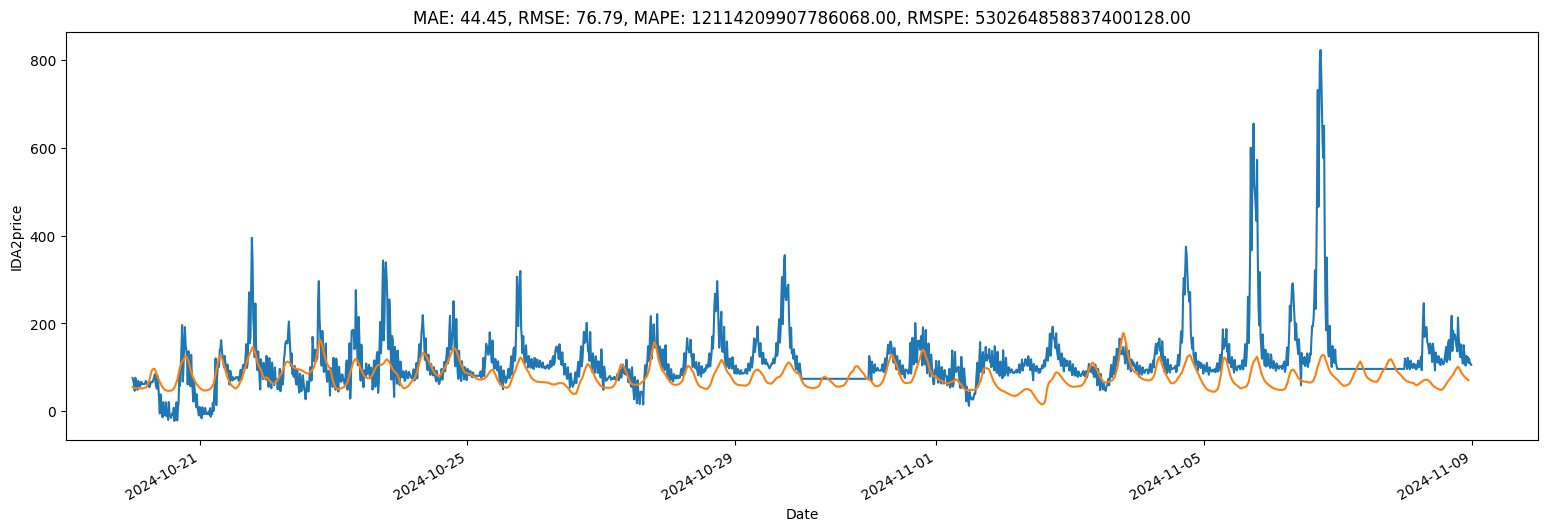

In [17]:
plt.plot(df_test['IDA2price'], label='Actual consumption')
plt.plot(df_forecast['IDA2price'], label='Predicted consumption')
# change axis date format
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('IDA2price')
plt.title(plt_title)
# set figsize to (19, 6)
plt.gcf().set_size_inches(19, 6)

In [18]:
from keras.layers import Dense, Bidirectional, GRU, Dropout # type: ignore

In [19]:
# defining the model
model = Sequential()
model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

d:\Projects\Programming\Gen-I Trading Challenge\Task 2\.venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 672, 100)       │        17,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 672, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,801 (245.32 KB)

 Trainable params: 62,801 (245.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [20]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 142s 879ms/step - loss: 0.0067 - val_loss: 6.5947e-05
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 115s 753ms/step - loss: 0.0011 - val_loss: 4.7530e-05
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 119s 774ms/step - loss: 8.3407e-04 - val_loss: 5.9839e-05
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 130s 850ms/step - loss: 7.0635e-04 - val_loss: 3.7344e-05
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 680ms/step - loss: 3.3843e-04 - val_loss: 8.7531e-05
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 114s 748ms/step - loss: 4.2168e-04 - val_loss: 2.8534e-05
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 126s 824ms/step - loss: 5.0550e-04 - val_loss: 3.3276e-05
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 121s 789ms/step - loss: 2.8776e-04 - val_loss: 5.3424e-05
Epoch 9/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 122s 797ms/step - loss: 2.2545e-04 - val_loss: 2.8751e-05
Epoch 10/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 119s 777ms/step - loss: 1.8340e-04 - val_loss: 3.7855e-05


In [21]:
n_days_for_prediction = df_test.shape[0]
predict_period_dates = pd.date_range(split_date, periods = n_days_for_prediction, freq='15min').tolist()
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_train_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i)

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step


In [22]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'IDA2price':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])
df_forecast.index = df_forecast['date']
df_forecast = df_forecast.drop('date', axis=1)
df_forecast

,IDA2price
date,
2024-10-20 00:00:00,-2.077957
2024-10-20 00:15:00,5.678324
2024-10-20 00:30:00,5.146450
2024-10-20 00:45:00,2.676764
2024-10-20 01:00:00,0.333832
...,...
2024-11-08 21:45:00,-6.244087
2024-11-08 22:00:00,-1.002744
2024-11-08 22:15:00,-0.380860


In [23]:
df_test = df_test[:n_days_for_prediction]
df_test

,IDA2price,IDA1price,forecast_production,SIPXprice,forecast_consumption
date,,,,,
2024-10-20 00:00:00,74.95,69.21,1847.0,52.07,952.0
2024-10-20 00:15:00,69.01,54.08,1847.0,52.07,952.0
2024-10-20 00:30:00,61.71,43.42,1847.0,52.07,952.0
2024-10-20 00:45:00,45.82,31.59,1847.0,52.07,952.0
2024-10-20 01:00:00,75.63,63.98,1765.0,49.82,904.0
...,...,...,...,...,...
2024-11-08 22:45:00,110.01,87.56,1735.0,113.00,1432.0
2024-11-08 23:00:00,118.90,119.36,1676.0,104.06,1327.0
2024-11-08 23:15:00,108.14,110.95,1676.0,104.06,1327.0


In [26]:
mse = root_mean_squared_error(df_test['IDA2price'], df_forecast['IDA2price'])
mae = mean_absolute_error(df_test['IDA2price'], df_forecast['IDA2price'])
mape = mean_absolute_percentage_error(df_test['IDA2price'], df_forecast['IDA2price'])
rmspe = mean_squared_percentage_error(df_test['IDA2price'], df_forecast['IDA2price'], square_root=True)

plt_title = 'MAE: {0:.2f}, RMSE: {1:.2f}, MAPE: {2:.2f}, RMSPE: {3:.2f}'.format(mae, mse, mape*100, rmspe*100)

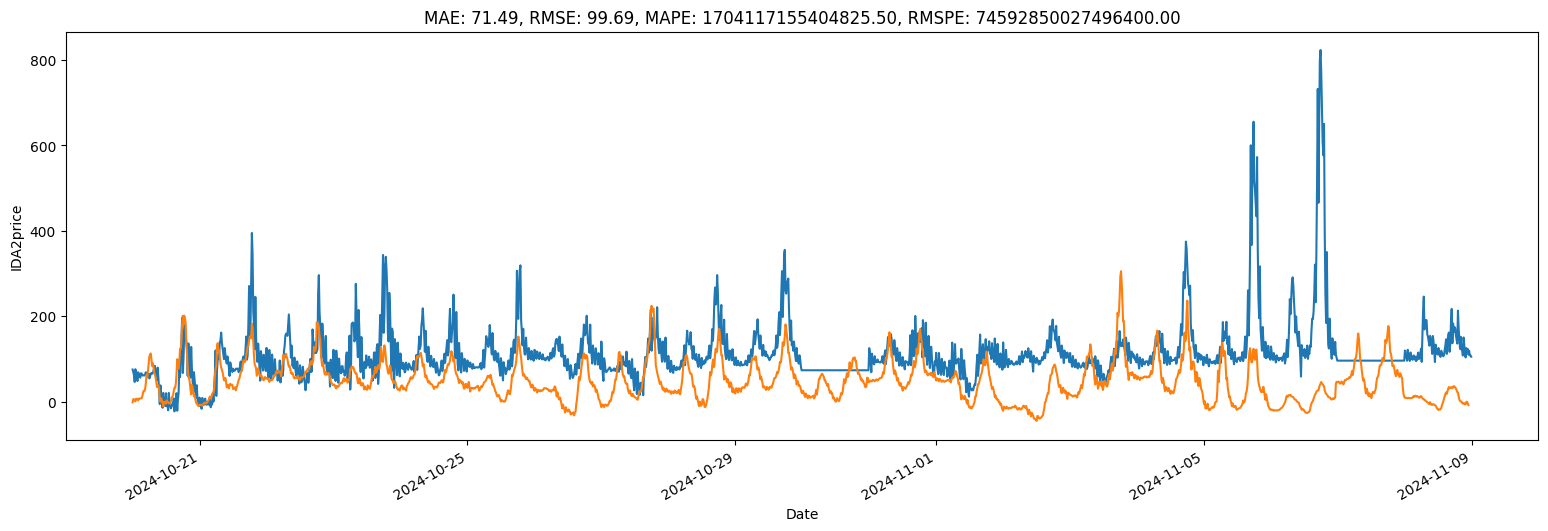

In [27]:
plt.plot(df_test['IDA2price'], label='Actual consumption')
plt.plot(df_forecast['IDA2price'], label='Predicted consumption')
# change axis date format
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('IDA2price')
plt.title(plt_title)
# set figsize to (19, 6)
plt.gcf().set_size_inches(19, 6)

In [29]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4425409175501404972
xla_global_id: -1
]


In [ ]:
# %%

output = merge['predicted_price_IDA2'].copy()
output.index = output.index.strftime('%Y-%m-%dT%H:%M:%S')
output.to_csv('data/forecasts/forecast_11-11.csv', header=False)
output

date
2024-11-10T00:00:00    101.512984
2024-11-10T00:15:00     97.211150
2024-11-10T00:30:00     95.113712
2024-11-10T00:45:00     94.114247
2024-11-10T01:00:00     98.353173
                          ...    
2024-11-10T22:45:00     96.053923
2024-11-10T23:00:00    104.208316
2024-11-10T23:15:00    100.138085
2024-11-10T23:30:00     95.923448
2024-11-10T23:45:00     92.484308
Name: predicted_price_IDA2, Length: 96, dtype: float64